## Import Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
# Download dataset
path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")
print("Path to dataset files:", path)

df = pd.read_csv(f'{path}/yield_df.csv')
print(df.head())

Using Colab cache for faster access to the 'crop-yield-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/crop-yield-prediction-dataset
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


## Explore Data

In [ ]:
print("\nDataFrame Info:")
df.info()

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Description:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB

First 5 rows of the DataFrame:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2      

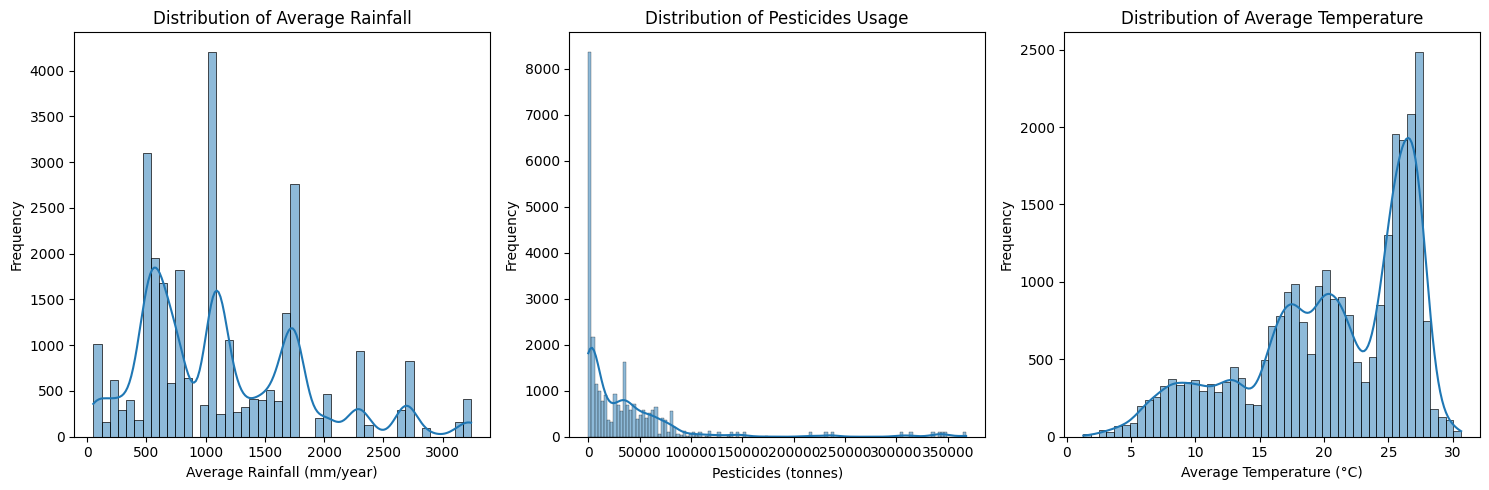

In [ ]:
# Visualize the distribution of numerical features before scaling
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['average_rain_fall_mm_per_year'], kde=True)
plt.title('Distribution of Average Rainfall')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['pesticides_tonnes'], kde=True)
plt.title('Distribution of Pesticides Usage')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['avg_temp'], kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Clean Data

In [ ]:
# Convert yield from hg/ha to tonnes/ha (1 tonne = 1,000,000 hg)
df['yield_tonnes_ha'] = df['hg/ha_yield'] / 10000

# Remove 'hg/ha_yield' column and the 'Unnamed: 0' column
df = df.drop(columns=['hg/ha_yield', 'Unnamed: 0'])

print("\nDataFrame after cleaning:")
print(df.head())


DataFrame after cleaning:
      Area         Item  Year  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990                         1485.0   
1  Albania     Potatoes  1990                         1485.0   
2  Albania  Rice, paddy  1990                         1485.0   
3  Albania      Sorghum  1990                         1485.0   
4  Albania     Soybeans  1990                         1485.0   

   pesticides_tonnes  avg_temp  yield_tonnes_ha  
0              121.0     16.37           3.6613  
1              121.0     16.37           6.6667  
2              121.0     16.37           2.3333  
3              121.0     16.37           1.2500  
4              121.0     16.37           0.7000  


## One-Hot Encode: Convert categorical features into numerical format.

In [ ]:
# One-Hot Encode: Convert categorical features ('Area', 'Item') into numerical format.
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'], drop_first=True)

print("\nDataFrame after one-hot encoding:")
# df_encoded.describe()
print(list(df_encoded.columns))


DataFrame after one-hot encoding:
['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'yield_tonnes_ha', 'Area_Algeria', 'Area_Angola', 'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria', 'Area_Azerbaijan', 'Area_Bahamas', 'Area_Bahrain', 'Area_Bangladesh', 'Area_Belarus', 'Area_Belgium', 'Area_Botswana', 'Area_Brazil', 'Area_Bulgaria', 'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon', 'Area_Canada', 'Area_Central African Republic', 'Area_Chile', 'Area_Colombia', 'Area_Croatia', 'Area_Denmark', 'Area_Dominican Republic', 'Area_Ecuador', 'Area_Egypt', 'Area_El Salvador', 'Area_Eritrea', 'Area_Estonia', 'Area_Finland', 'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece', 'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti', 'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia', 'Area_Iraq', 'Area_Ireland', 'Area_Italy', 'Area_Jamaica', 'Area_Japan', 'Area_Kazakhstan', 'Area_Kenya', 'Area_Latvia', 'Area_Lebanon', 'Area_L

## Split and Scale


In [ ]:
# Define features (X) and target (y)
X = df_encoded.drop('yield_tonnes_ha', axis=1)
y = df_encoded['yield_tonnes_ha']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler() # Transform data to have a mean of 0 and standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData splitting and scaling complete.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Data splitting and scaling complete.
Shape of X_train_scaled: (22593, 113)
Shape of X_test_scaled: (5649, 113)
Shape of y_train: (22593,)
Shape of y_test: (5649,)


## Linear Regression

In [ ]:
# Train Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Predict
y_pred_linear_reg = linear_reg_model.predict(X_test_scaled)

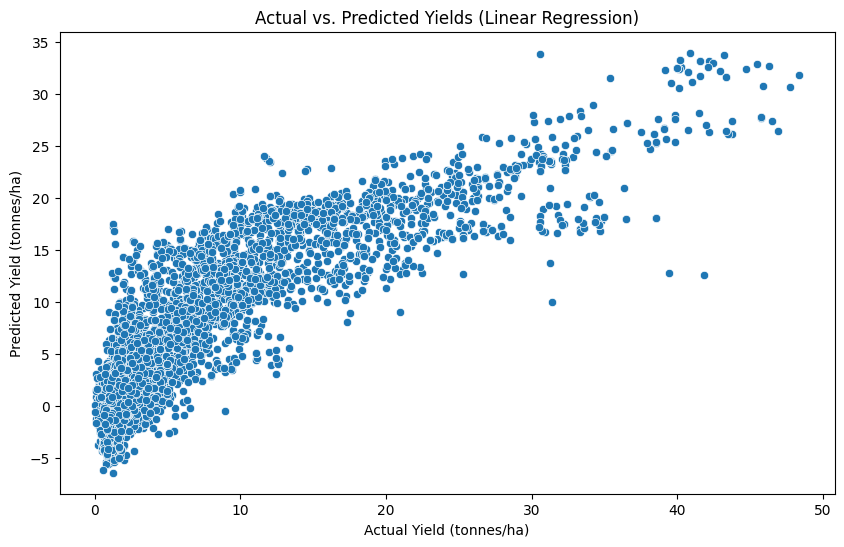

In [ ]:
# Actual vs. predicted yields
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear_reg)
plt.xlabel("Actual Yield (tonnes/ha)")
plt.ylabel("Predicted Yield (tonnes/ha)")
plt.title("Actual vs. Predicted Yields (Linear Regression)")
plt.show()

In [ ]:
# Evaluate Linear Regression model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mse_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("\n--- Linear Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_linear_reg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear_reg:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear_reg:.2f}")
print(f"R-squared (R²): {r2_linear_reg:.2f}")


--- Linear Regression Model Evaluation ---
Mean Squared Error (MSE): 17.76
Root Mean Squared Error (RMSE): 4.21
Mean Absolute Error (MAE): 2.96
R-squared (R²): 0.76


## Decision Tree

In [ ]:
# Train Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Predict
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

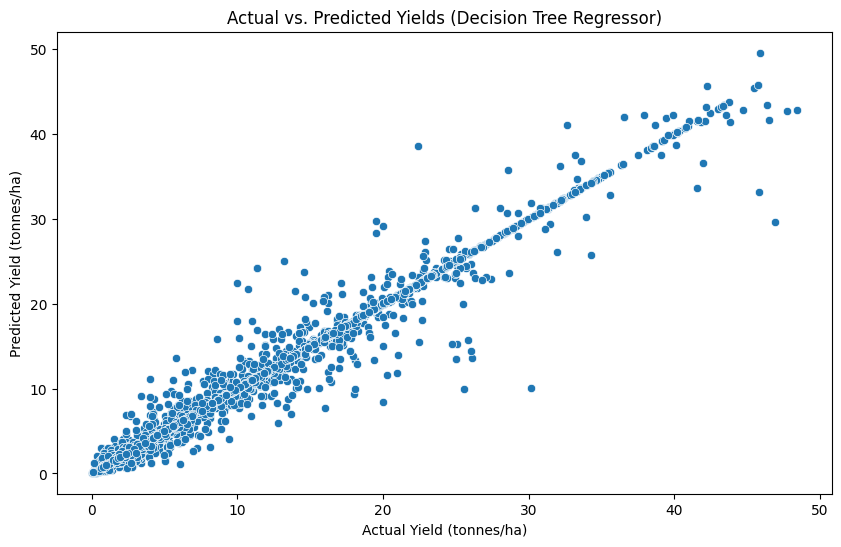

In [ ]:
# Visualize actual vs. predicted yields
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_decision_tree)
plt.xlabel("Actual Yield (tonnes/ha)")
plt.ylabel("Predicted Yield (tonnes/ha)")
plt.title("Actual vs. Predicted Yields (Decision Tree Regressor)")
plt.show()

In [ ]:
# Evaluate Decision Tree model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("\n--- Decision Tree Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_decision_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_decision_tree:.2f}")
print(f"Mean Absolute Error (MAE): {mae_decision_tree:.2f}")
print(f"R-squared (R²): {r2_decision_tree:.2f}")


--- Decision Tree Regressor Model Evaluation ---
Mean Squared Error (MSE): 1.44
Root Mean Squared Error (RMSE): 1.20
Mean Absolute Error (MAE): 0.36
R-squared (R²): 0.98


## Visualize Decision Tree

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_tree_model,
                           out_file=None,
                           feature_names=X_train.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3) # Limit

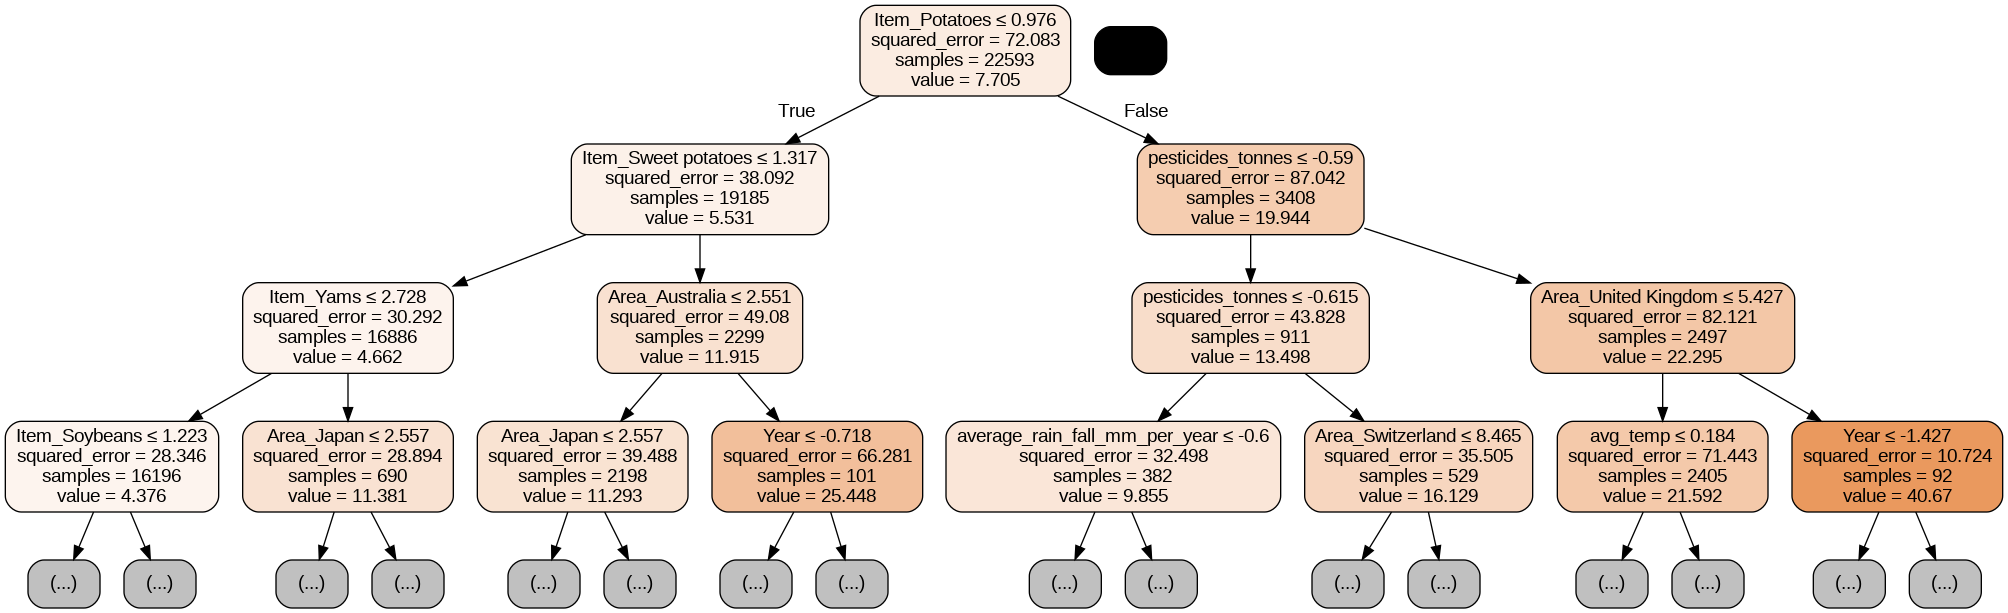

In [ ]:
from pydotplus.graphviz import graph_from_dot_data
from IPython.display import Image

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

## Comparison

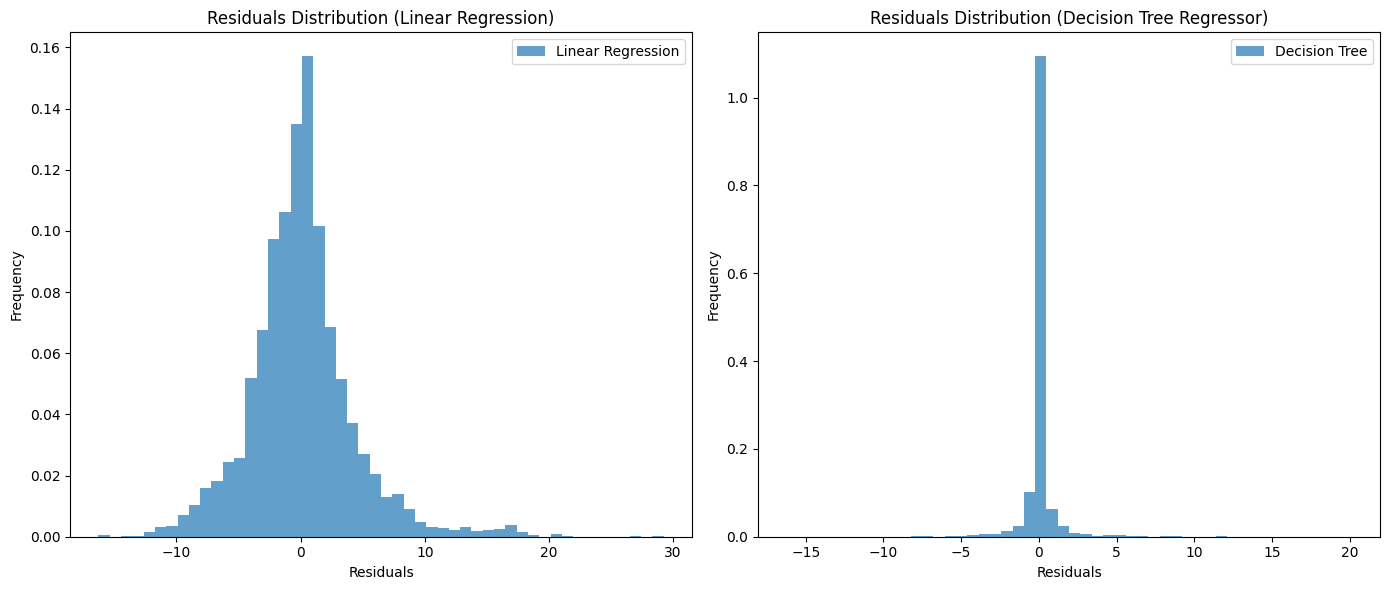

In [ ]:
# Calculate residuals
residuals_linear_reg = y_test - y_pred_linear_reg
residuals_decision_tree = y_test - y_pred_decision_tree

# Plot residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_linear_reg, bins=50, density=True, alpha=0.7, label='Linear Regression')
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(residuals_decision_tree, bins=50, density=True, alpha=0.7, label='Decision Tree')
plt.title("Residuals Distribution (Decision Tree Regressor)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# Compare evaluation metrics
metrics_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)'],
    'Linear Regression': [mse_linear_reg, rmse_linear_reg, mae_linear_reg, r2_linear_reg],
    'Decision Tree': [mse_decision_tree, rmse_decision_tree, mae_decision_tree, r2_decision_tree]
}

metrics_table = pd.DataFrame(metrics_data)

print("\n--- Model Evaluation Metrics Comparison ---")
display(metrics_table)

# A lower RMSE indicates a better fit.
# A higher R² value (close to 1) indicates a better fit.


--- Model Evaluation Metrics Comparison ---


,Metric,Linear Regression,Decision Tree
0,Mean Squared Error (MSE),17.761170,1.439360
1,Root Mean Squared Error (RMSE),4.214400,1.199733
2,Mean Absolute Error (MAE),2.958250,0.360062
3,R-squared (R²),0.755142,0.980157


The results confirm the hypothesis from Proposed Method and Expected Results: crop yield prediction is a complex task with non-linear dependencies that are better captured by models like the Decision Tree Regressor. Therefore, for practical applications in sustainable agriculture, the Decision Tree model is the recommended choice.

## Sample Run

In [ ]:
# Example sample data
sample_data = {
    'Year': [2010],
    'average_rain_fall_mm_per_year': [10.0],
    'pesticides_tonnes': [5000.0],
    'avg_temp': [20.0],
    # Add values for the specific 'Area' and 'Item' for this sample.
    'Area_United Kingdom': [1],
    'Item_Maize': [1]
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)


# Reindex the sample DataFrame to have the same columns as the training data (X_train)
# Also, Fill missing columns with 0
sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)

# Scale the sample data using the same scaler fitted on the training data
# scaler = StandardScaler()
# scaler.fit(X_train)
sample_scaled = scaler.transform(sample_df)

# Make prediction
predicted_yield = decision_tree_model.predict(sample_scaled)

print(f"\nPredicted yield for the sample data: {predicted_yield[0]:.2f} tonnes/ha")


Predicted yield for the sample data: 7.82 tonnes/ha


In [ ]:
# Example sample data with different rainfall
sample_data_high_rainfall = {
    'Year': [2023],
    'average_rain_fall_mm_per_year': [1000.0],  # Increased rainfall
    'pesticides_tonnes': [10],
    'avg_temp': [30000.0],
    'Area_United Kingdom': [1],
    'Item_Maize': [1]
}

# Convert sample data to DataFrame
sample_df_high_rainfall = pd.DataFrame(sample_data_high_rainfall)

# Reindex and fill missing columns with 0
sample_df_high_rainfall = sample_df_high_rainfall.reindex(columns=X_train.columns, fill_value=0)

# Scale the sample data
sample_scaled_high_rainfall = scaler.transform(sample_df_high_rainfall)

# Make prediction using the Decision Tree model
predicted_yield_high_rainfall = decision_tree_model.predict(sample_scaled_high_rainfall)

print(f"\nPredicted yield for the sample data with high rainfall: {predicted_yield_high_rainfall[0]:.2f} tonnes/ha")


Predicted yield for the sample data with high rainfall: 0.84 tonnes/ha


## Save models

In [ ]:
import joblib

joblib.dump(linear_reg_model, 'linear_regression_model.pkl')
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.
